0.9293389199255122

In [ ]:
# compare # sqrt(n) features from num_esimators:

stat_sqrt_num_features = StatScore('num_estimators', 'accuracy_mean', 'BaggingClassifier. Max features = sqrt(num_features)')

for n_est in max_f_list:
    bag_cl_all_n = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=n_est, random_state=0, max_features=max_features, n_jobs=-1).fit(X, y)
    cvs = cross_val_score(bag_cl_all_n, X, y, cv=10, n_jobs=-1)
    stat_sqrt_num_features.add_stat_point(n_est, cvs.mean())

In [ ]:
D:\GD Anton\Мои Документы\dev\_data\02_coursera_yandex\_02_обучение на размеченных данных\02_week_4\04_random_forest_program.ipynb

In [ ]:
class StatScore:

    def __init__(self, x_desc, y_desc, title) -> None:
        self.x = []
        self.y = []
        self.x_desc = x_desc
        self.y_desc = y_desc
        self.title = title

    def add_stat_point(self, x, y) -> None:
        self.x.append(x)
        self.y.append(y)

    def plot(self, x_desc, y_desc, title) -> None:
        
        self.x_desc = x_desc
        self.y_desc = y_desc
        self.title = title

        plt.plot(self.x, self.y)
        plt.xlabel(self.x_desc)
        plt.ylabel(self.y_desc)
        plt.title(self.title)
    
    def get_data(self) -> None:
        return self.x, self.y    

In [ ]:
# Решающие деревья от 1 до 99. 

stat_all = StatScore('num_esitmators', 'mean_accuracy', 'BaggingClassifier. Mean_accuracy от количества рещающих деревьев.')

for n_est in max_f_list:
    d_tree_cl = DecisionTreeClassifier()
    bag_cl_all_n = BaggingClassifier(base_estimator=d_tree_cl, n_estimators=n_est, random_state=0, n_jobs=-1).fit(X, y)
    cvs = cross_val_score(bag_cl_all_n, X, y, cv=10, n_jobs=-1)
    stat_all.add_stat_point(n_est, cvs.mean())


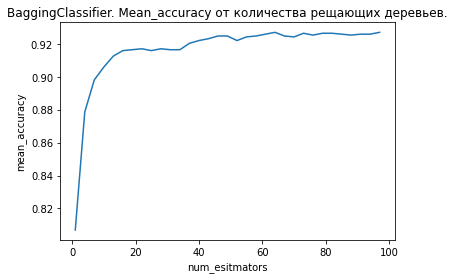

In [ ]:
stat_all.plot()

0.9460117939168218

In [ ]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until al